# **CH06 차원축소**

---

# **20230602**

## **01 차원축소(Demension Reduction) 개요**

- `데이터를 의미있게 줄이는 것`

- **주성분(이 되는 축 추출) 분석** (PCA 기반 나머지 확장 버전) 

    - PCA : 정방행렬에서만 작동 => **데이터 기반** 축 찾기
    - LDA :     => **클래스(답) 기반** 축 찾기
    - SVD : 정방행렬이 아닌 직렬행렬에서도 작동 (PCA의 확장)
    - NMF : 양수 데이터인 경우 추출?

<br>

+) 정방행렬 :  행과 열의 수가 같음 


- 차원축소
: 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세이트를 생성하는 것

- 일반적으로 차원이 증가할 수록 데이터 포인트(점)의 거리가 기하급수적으로 멀어지게되고, ***희소(sparse)*** 한 구조를 가지게 된다.<br>
    $\Rightarrow$ 차원이 많아질 수록 희소한 공간이 많아짐 <br>
    $\Rightarrow$ 설명할 수 없는 공간이 많아짐 <br>
    $\Rightarrow$ 예측 신뢰도 떨어짐 <br>
    $\sim$ 피처가 많을 수록 개별 피처간에 상관관계가 높을 가능성이 큼 = 다중공선성 문제 = 예측 성능 저하

    $\Rightarrow$ 차원축소 -> 데이터의 설명력 상승, 처리 시간 감소

<br>

- 피처 선택 = 특성선택 : 특정 피처에 종속석이 강한 불필요한 피처는 아예 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것

- **피처 추출 : 기존 피처를 저차원의 중요피처로 압축해서 추출하는 것 = 차원 축소**
    - 단순 압축이 아닌 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는것 => ***잠재적 요소를 추출*** <= PCA,SVD, NMF

    - 주로 이미지 처리에서 사용 ~ 매우 많은 픽셀로 이미지 데이터에서 잠재적 특성을 피처로 도출 => 이미지 분석, 변환, 압축

## **02 PCA(Principal Component Analysis)**

### O PCA 개요

: 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법.

- 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소함 => 주성분 => 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주

- 데이터 변동성이 가장 큰 방향으로 축 생성, 새롭게 생성된 축으로 데이터 투영


- 첫번째 벡터 축 = 첫번째 주성분 = 가장 큰 분산을 가지는
- 두번째 벡터 축 = 첫번째 벡터 축에 직각이 되는 벡터(직교 벡터)


- 입력 데이터의 공분산 행렬(Convariance Matrix)을 고유값 분해하고, 이렇게 구한 **고유 벡터**에 입력 데이터를 선형변환하는 것. 
    - 이 **고유 벡터가** PCA의 주성분 벡터로서 입력데이터의 분산이 큰 **방향을 나타냄**.
    - **고윳값(eigenvalue)은 고유 벡터의 크기**를 나타냄 = 입력데이터의 분산



#### ㅇ **벡터** -> 크기, 방향으로 정의된 값

1) 화살표 같은 것 : 방향
2) *숫자를 순서대로 나열*
3) **벡터 공간(vector space)의 원소(점)**


- 벡터의 기본 연산

    - 상수배
        
        $\overrightarrow{a} = [1,1] \\
        \ \\
         3 * \overrightarrow{a} = [3,3]
        $


    - 벡터 간의 합
    
        $\overrightarrow{a} = [2,1] ,\overrightarrow{b} = [1,2] \\
        \ \\
        \overrightarrow{a} + \overrightarrow{b} = [3,3]
        $



#### ㅇ 행렬 

- 스칼라(단일값) -> 벡터 -> 행렬

1) 벡터 여러개의 집합

2) 벡터의 **선형 변환**(상수배, 합) : 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것 <br> 
$\Rightarrow$ 행렬은 함수의 파라미터

<br>

$$
 \overrightarrow{k} = [3,2] , A = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}\\
\ \\
\overrightarrow{k} \times A = [3,2] * \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix} = \begin{bmatrix} 3*2 + 2*1 \\ 3*1 + 2*2 \end{bmatrix} = [8,7]
$$





#### ㅇ 공분산

- 분산 : 한개의 특정한 변수의 데이터 변동
- 공분산 : 두 변수 간의 변동

ex) 사람 키 변수 X, 몸무게 변수 Y => 공분산 Cox(X,Y) > 0 ~ X(키)가 증가할 때 Y(몸무게)도 증가

<br>

- 공분산 행렬 : 여러변수와 관련된 공분산을 포함하는 정방향 행렬 

ex) **대각선 = 각 변수별 분산**

|'|X|Y|Z|
|:---:|:---:|:---:|:---:|
|X|**0.3**|-0.71|-0.24|
|Y|-0.71|**4.5**|0.91|
|Z|-0.24|0.28|**0.91**|


#### ㅇ **고유벡터** : 행렬 A를 곱하더라도(선형변환) 방향이 변하지 않고 그 **크기만 변하는** 벡터


$\Rightarrow A \times k = \lambda \times k$ <br>
<br>
(행렬 A, 고유벡터(방향) k, 고윳값 $\lambda$)

<br>

+) 정방행렬은 최대 그 차원 수 만큼의 고유 벡터를 가질 수 있다. => 고유벡터는 행렬을 분해하는데 사용

#### ㅇ 공분산 행렬

- 정방행렬(Diagonal Matrix) : 행과 열이 같은 행렬
- 대칭행렬(Symmetric Matrix) : 정방행렬 중 대각 원소를 중심으로 원소값 대칭인 행렬 <br>
    **$\Rightarrow A^T = A$**
    - **대칭 행렬**은 항상 고유벡터를 직교행렬(orthogonal matrix)로,<br> 고유값을 정방행렬로 대각화 가능

ex) 대칭행렬

||x|y|z|
|:---:|:---:|:---:|:---:|
|x|1|4|5|
|y|4|2|6|
|z|5|6|3|

<br>

- 공분산 행렬 C <br>

$$ C = P\sum{P^T} $$

-> P는 n x n 직교 행렬, $\sum$는 n x n 정방행렬, $P^T$는 행렬 P의 전치 행렬

<br>

$$
C = \begin{bmatrix}e_1 \cdots e_n \end{bmatrix}\begin{bmatrix}\lambda_1 \cdots 0 \\ \cdots  \cdots  \cdots \\ 0 \cdots \lambda_n \end{bmatrix}\begin{bmatrix}e_1^t \\ \cdots \\ e_n^t \end{bmatrix}
$$

- 공분산 C는 고유벡터 직교행렬 * 고윳값 정방 행렬 * 고유벡터 직교 행렬의 전치 행렬

- $e_i$ 는 i번째 고유벡터, $\lambda_i$ 는 i번째 고유벡터의 크기를 의미
- $e_1$ 는 가장 분산이 큰 방향을 가진 고유벡터, $e_2$는 $e_1$에 수직이면서 다음으로 가장 분산이 큰 방향을 가진 고유벡터

#### ㅇ PCA

- **입력데이터이 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식**

- PCA 수행 순서

    1. 입력 데이터 세트의 공분산 행렬 생성
    2. 공분산 행렬의 고유 벡터와 고유값을 계산
    3. 고유값이 가장 큰 순으로 K개 (PCA 변환 차수 만큼)만큼 고유 벡터를 추출
    4. 고유값이 가장 큰 순으로 추출된 공유 벡터를 이용해 새롭게 입력 데이터를 변환

### O 붓꽃 데이터

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()


# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


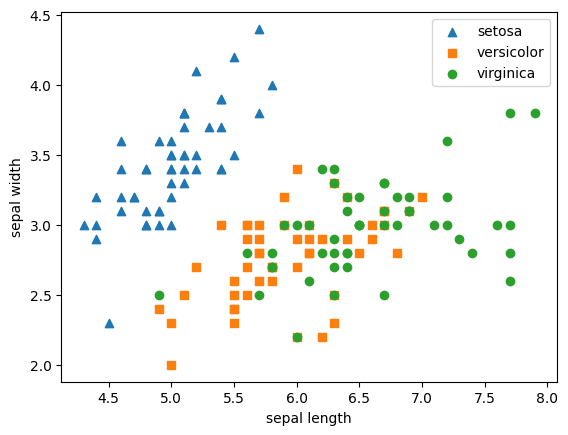

In [2]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']


#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])


plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
# PCA전 정규화 필수

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])


In [4]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2) # 4차원 => 2차원 축소


# fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
# fit할 때 데이터만 필요 => 비지도 학습
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)


(150, 2)


In [5]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


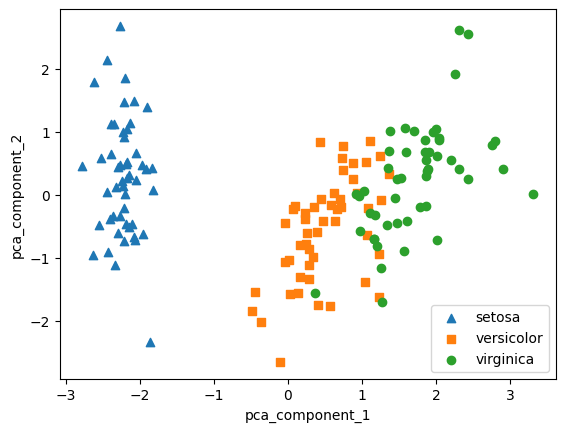

In [6]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']


#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행.
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])


plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [7]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [9]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']] # 답 제외
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


In [13]:
# !pip install xlrd

  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)


### O 연체 여부 예측

In [14]:
import pandas as pd

df = pd.read_excel('../data/pca_creaidt_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [15]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [16]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

<Axes: >

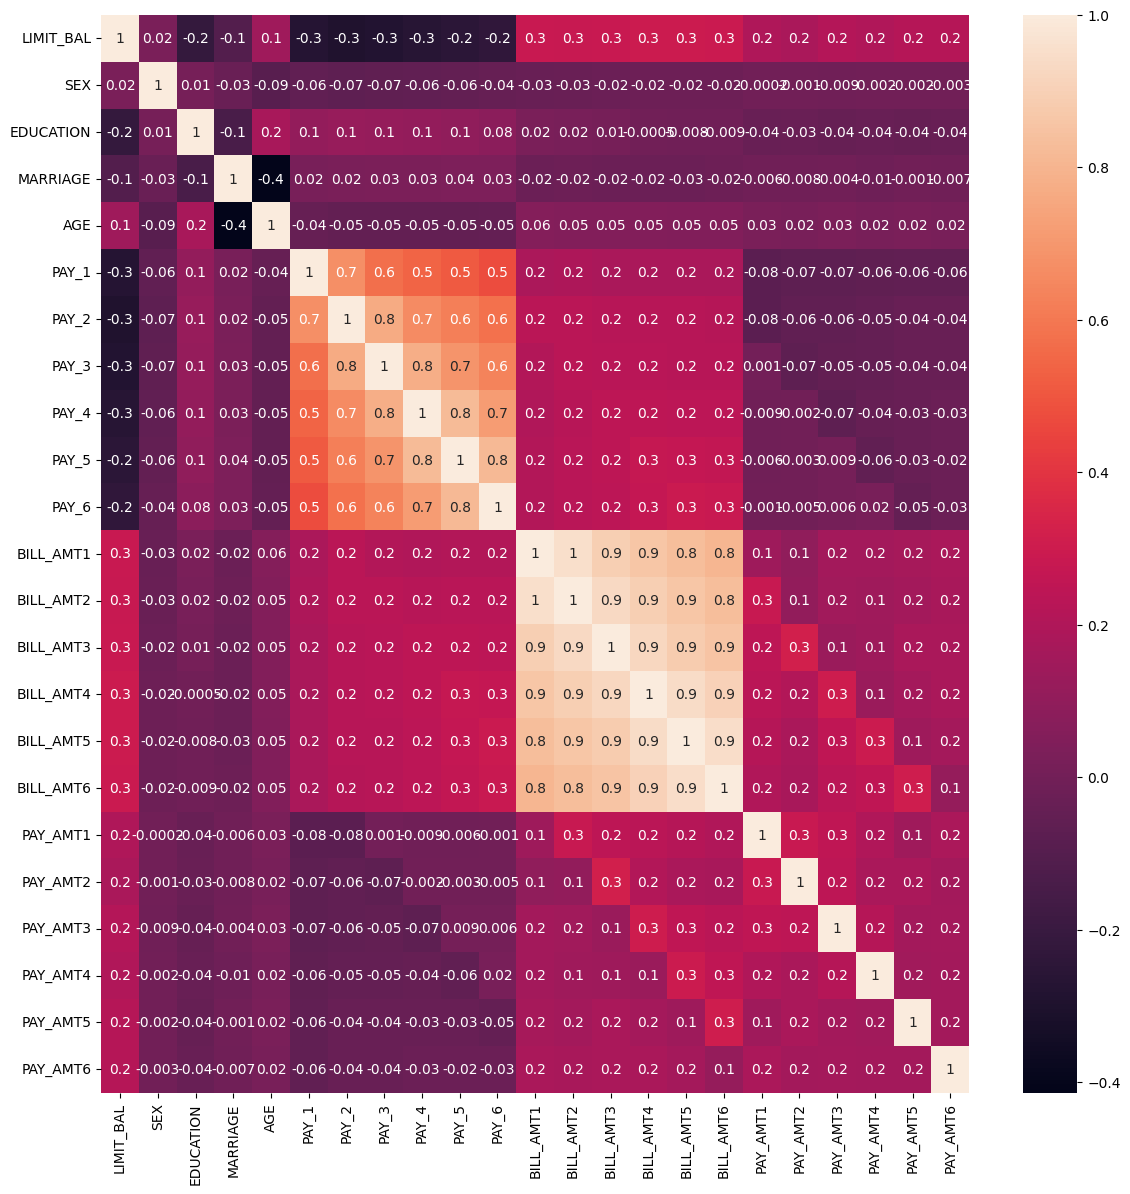

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


corr = X_features.corr() # 데이터 프레임에 컬럼별로 상관계수 출력
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

---

# **20230605**

## **03 LDA(Linear Disciminant Analysis)**

### O LDA 개요

: 선형 판별 분석법 => PCA와 매우 유사

- 특정 공간 상에서 클래스(답) 분리를 최대화 하는 축을 찾기 위해 `클래스 간 분산`과 `클래스 내부 분산`의 비율을 최대화 하는 방식으로 차원을 축소 <br>
=> 답을 기준으로 차원 축소

- 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져감



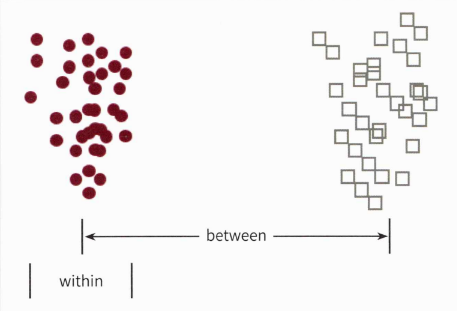

In [1]:
# 좋은 클래스 분리 : 클래스 간 분산이 크고 클래스 내부 분산이 작은 것

from IPython.display import Image
Image('./ch06_LDA.png')

#### ㅇ **LDA 구하기**

1. 클래스 별 평균 계산

2. 클래스 내부와 클래스 간 **분산 행렬**을 구한다. 
$ 분산 = \sum{(x- \overline{x})^2}$  
(이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터(mean vector)를 기반으로 구함)

3. 클래스 내부 분산 행렬을 $S_B$라고 하면 다음 식으로 두 행렬을 고유 벡터로 분해 할 수 있다.

$$ S_W^TS_B = \begin{bmatrix} e_1 & \cdots & e_n \end{bmatrix} \begin{bmatrix} \lambda_1 & \cdots & 0 \\ \cdots & \cdots & \cdots \\ 0 & \cdots & \lambda_n \end{bmatrix} \begin{bmatrix} e_1^T \\ \cdots \\ e_n^T \end{bmatrix} $$

4. 고유값이 가장 큰 순으로 K개 (LDA변환 차수만큼) 추출

5. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

#### ㅇ **붓꽃 데이터 세트에 LDA 적용하기**

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 품종 3개 : 클래스  3개, 피처 4개 => 4차원 데이터

# 데이터로드
iris = load_iris()
# 데이터 정규화
iris_scaled = StandardScaler().fit_transform(iris.data)

In [10]:
# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target

In [11]:
iris_scaled.shape

(150, 4)

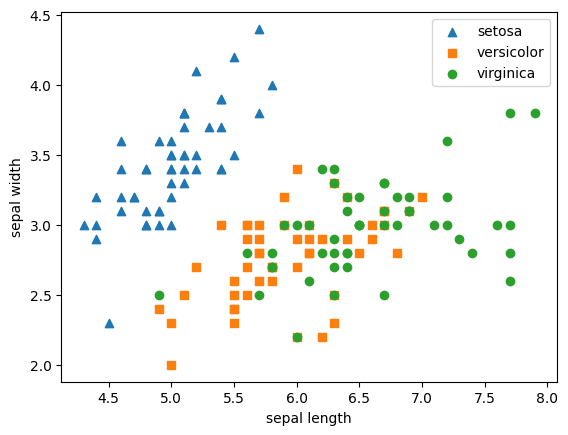

In [12]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']


#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])


plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# 원본 데이터 그래프

In [4]:
lda = LinearDiscriminantAnalysis(n_components=2)# 2차원 축소

# LDA에서의 fit에는 target이 필요 => 지도학습
lda.fit(iris_scaled, iris.target) # 식 완성
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


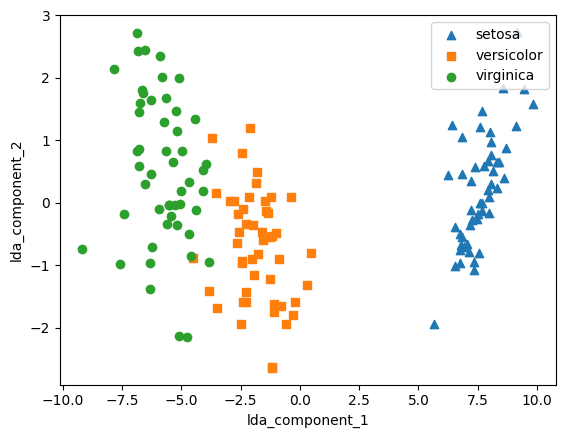

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target


#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']


#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']


    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])


plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

# LDA 후 그래프

## **04 SVD(Singular Value Decomposition)**

### O SVD 개요

- PCA와 유사한 행렬분해(축 찾기)

- 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있음

-  SVD : 행렬을 3개의 행렬 곱으로 분해


$$ A_{m \times n} = U \sum{V^T} $$

- **특이**(고유) 값 분해, 행렬 U와 V에 속한 벡터는 특이벡터(singular vector)

- 모든 특이 벡터는 서로 직교함, $\sum$는 **대각행렬** => 행렬의 대각에 위치한 값(**대각값**)만이 0이 아니고 나머지 위치의 값은 모두 0 <br> ~ 0이 아닌 값 = 행렬 A의 **특이값** 


+) ***특이값 = 중요도***

- 특이값은 항상 0 이상의 실수
- 특이값은 항상 내림차순 정렬됨(첫번째 대각값이가장 큼 => 이에 대응되는 차원은 원본데이터에서 중요도가 가장 높은 피처)


ex)

6 x 4  = (6 x 6) (6 x 4) (4 x 4)  

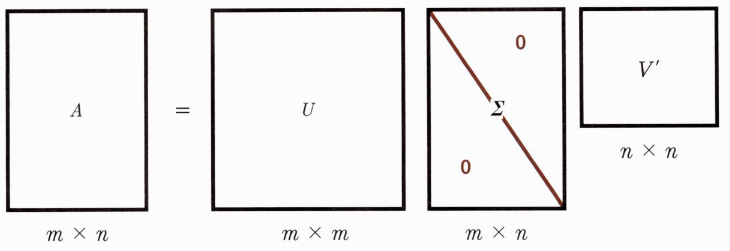

In [13]:
from IPython.display import Image
Image('./ch06_SVD.png')

#### ㅇ 행렬 분해

일반적으로는 다음과 같이 $\sum$의 비대각인 부분과 대각 원소 중에 **특이값이 0인 부분도 모두 제거**하고 제거된 $\sum$에 대응되는 U와 V 원소도 함께 제거해 차원을 줄인 형태로 SVD 적용

$\Rightarrow$ Truncated SVD : $\sum$의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것


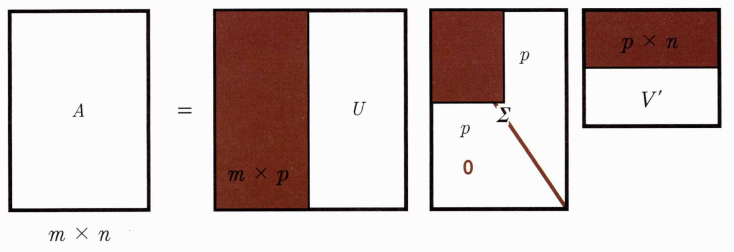

In [14]:
Image('./ch06_SVD2.png')

#### ㅇ 특이 벡터 : 차원축소, 데이터 변환, 재구성 함

- `특이값`에 의해 `얼마나` 축소,변환,재구성 할 것인지 정해짐



In [15]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd


# 4X4 Random 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))


[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [16]:
# 답 없이 원본데이터만 필요 => 비지도
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3)) # => 중요도
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [17]:
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [18]:
# 고의로 의존성을 부여
 
# a 행렬의 3번째 로우를 '첫번재 로우 + 두번째 로우'로 업데이트,
# 4번째 로우는 첫번째 로우와 같다고 업데이트
# => 상관관계를 높힘

a[2] = a[0] + a[1]
a[3] = a[0]

# 의존성을 부여한 a 행렬
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [19]:
# 다시 SVD를 수행하여 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

# 비슷한 데이터는 중요도(weight)가 떨어짐

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [20]:
# a[0]과 a[1]만 있어도 복원 가능한 형태

# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [26]:
# 완전히 같지는 않지만 반올림하면 모두 같게 결과 만들 수 있음
np.round(a,3) == np.round(a_,3)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [ ]:
# Truncated SVD 
# : 특이값 중 상위 일부 데이터만 추출해 분해하는 방식
 
# 6 -> 4차원으로 줄임



### O 사이킷런 TruncatedSVD 클래스를 이용한 변환

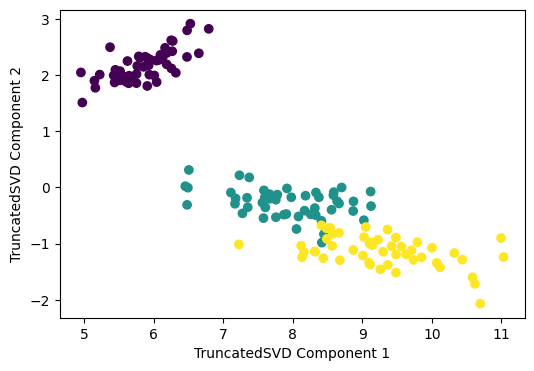

In [30]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)


plt.figure(figsize=(6,4))
# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

plt.show()

## **05 NMF(Non-Negative Matrix Factorizaion)**

### O NMF 개요

: Truncated **SVD**와 같이 낮은 랭크(축)를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형 <br>
$\Rightarrow$ 아무튼 차원 축소

- 원본 행렬 내의 모든 원소값이 모두 양수일 때 사용하는 기법 <br>
 $\rightarrow$  두 개의 양수 행렬로 분해

- **차원 축소를 통한 잠재 요소 도출** -> 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용

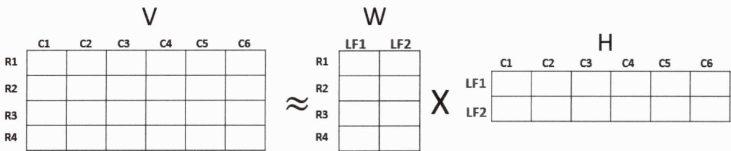

In [31]:
Image('./ch06_NMF.png')

#### ㅇ NMF 예시

$$  \begin{bmatrix} 1 \\ 2 \end{bmatrix} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} * \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} $$

$$ x + 2y = 1 \\ 3x + 4y = 2 $$

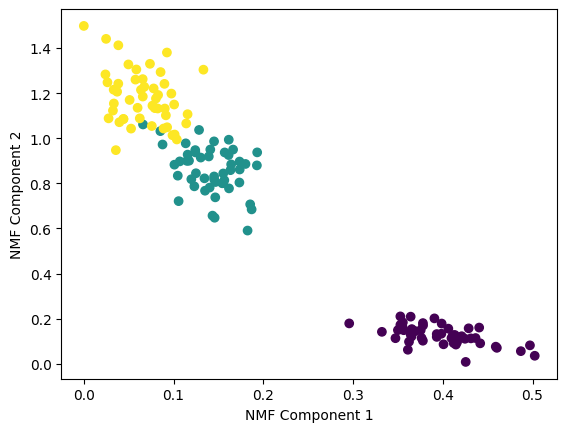

In [32]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline


iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')


plt.show()

## 정리

- 차원 축소는 이를 통해 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데 큰 의미가 있다.

- **PCA** : 입력 데이터의 변동성이 가장 큰 축을 구하고 이 축에 직각인 축을 반복적으로 축소하려는 차원 개수만큼 구함

- **LDA** : 클래스를 최대한으로 분리할 수 잇는 축을 찾음

- **SVD, NMF** : 고차원 행렬을 두개의 저차원 행렬로 분리 <br>
=> 잠재요소 추출 (토픽 모델링, 추천 시스템 등 에서 사용됨)